**Предобработка.**

Предобработка - важный процесс подготовки текстов и данных к дальнейшему статистическому анализу, визуализациям, построению моделей машинного обучения и т.д. Без качественной предобработки результаты могут искажёнными или вовсе ошибочными.

Самыми базовыми этапами предобработки текста являются *нормализация* текста и разделение на отдельные токены (*токенизация*), опционально - сегментация текста на предложения.

**Нормализация.**

Под нормализацией мы имеем в виду приведение текста к условно нормальному виду: удаление мусорных символов, остатков тэгов разметки, разрядки символов, множественных символов (например, четыре точки вместо трех) и тому подобная работа над текстом.

**Пример замусоренного текста 1.**

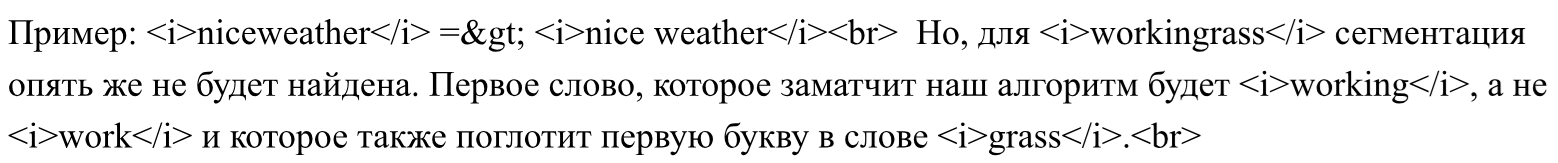

Для удаления замусоренного текста мы можем использовать регулярные выражения, с которыми вы уже знакомы по курсу анализа текста. Кратко говоря, это такой язык паттернов (шаблонов), позволяющий отлавливать разные сочетания символов. Например, '<\w+>' будет находить все сочетания, которые начинаются с < и заканчиваются >, а между ними должна находиться хотя бы одна буква или символ. За букву или символ отвечает \w, за логическое утверждение "хотя бы один" отвечает знак +.

Краткий список значков для построения шаблонов:

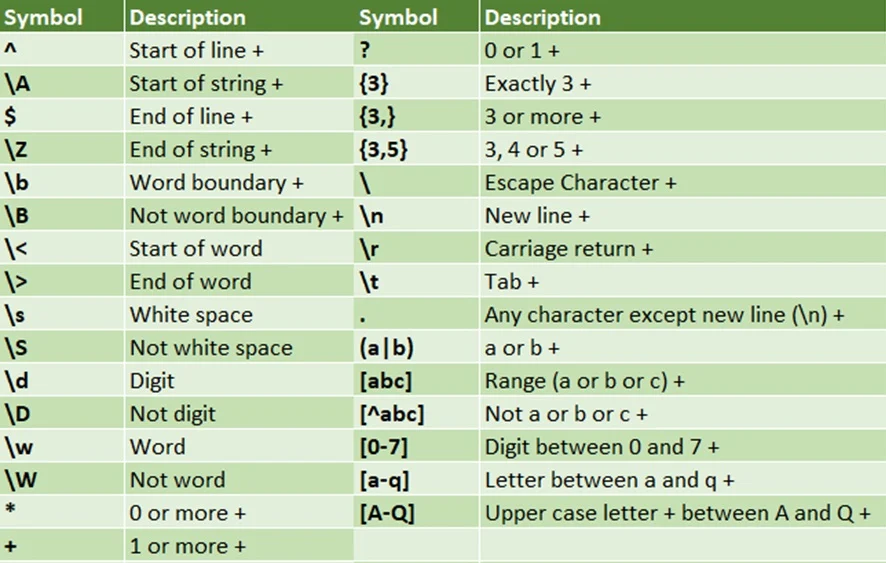

Полезный ресурс, который позволяет тестировать ваши регулярки, подсвечивает блоки и объясняет, что вообще ваше регулярное выражение делает: https://regex101.com/

Рассмотрим некоторые употребления регулярных вырыжений в питоне. Для этого нужно экспортировать специальную библиотеку **re**.

In [ ]:
import re

У неё есть много разных важных функций, для изучения всех советую прочитать в будущем документацию библиотеки: https://docs.python.org/3/library/re.html#functions

Мы же рассмотрим только самые употребительные - поиск всех повторов паттерна (нужно для поиска определенных размеченных сущностей, например, только существительных в тексте), выполняемый функцией **findall(pattern, string)** и замена паттернов (нужно в первую очередь для удаления мусорных символов), выполняемая функцией **sub(pattern, replacement, string)**. *Pattern* здесь - искомый шаблон, *replacement* - на что меняем, а *string* - обрабатываемый текст.

Это не исчерпывающий список употреблений, но на раннем этапе вам достаточно знать этих двух.

Рассмотрим для начала замены. Попробуем заменить кошек на собак в одном тексте:

In [ ]:
text = 'Я люблю кошек' #исходный текст
print(text) #распечатка исходного текста
repl_text = re.sub(r'кошек', 'собак', text) #замена кошек на собак в text, сохранение результата в переменную repl_text
print(repl_text) #распечатка результата замены

Часто заменяют, например, числа на какую-нибудь заглушку или тэг в целях более удобных подсчетов. Вариантов чисел может быть бесконечное множество, а мы всего лишь хотим посчитать количество словосочетаний "в ЧИСЛО году", а не каждое индивидуальное употребление "в 1976 году", "в 2000 году", "в 2024 году".

Простой способ найти все числа - это использовать специальный значок **\d** или **[0-9]**, это паттерны для поиска одной любой цифры.

In [ ]:
text = 'Я родился в 1956 году' #исходный текст
print(text) #распечатка исходного текста 
search_result = re.sub(r'\d', 'ЧИСЛО', text) #замена цифры на 'ЧИСЛО'
print(search_result) #распечатка результата замены

Аналогично:

In [ ]:
text = 'Я родился в 1956 году' #исходный текст
print(text) #распечатка исходного текста 
search_result = re.sub(r'[0-9]', 'ЧИСЛО', text) #замена цифры на 'ЧИСЛО'
print(search_result) #распечатка результата замены

Пока что получилось плохо: мы заменили каждую отдельную циферку на слово 'ЧИСЛО'. Для решения нам нужны специальные значки, в данном случае **+**, который будет находить целые числа целиком, потому что **+** означает "1 или более повторов предыдущего", а предыдущим будет как раз символ, обозначающий любую цифру:

In [ ]:
text = 'Я родился в 1956 году' #исходный текст
print(text) #распечатка исходного текста 
search_result = re.sub(r'\d+', 'ЧИСЛО', text) #замена цифры на 'ЧИСЛО'
print(search_result) #распечатка результата

Для надежности можно поставить специальные значки **\b**, которые означают "граница слова". Это довольно полезная практика, когда вы хотите ограничиваться именно отдельными словами и не захватывать ничего лишнего (например, два слова или вообще весь текст).

In [ ]:
text = 'Я родился в 1956 году' #исходный текст
print(text) #распечатка исходного текста 
search_result = re.sub(r'\b\d+\b', 'ЧИСЛО', text) #замена цифры на 'ЧИСЛО'
print(search_result) #распечатка результата

Результат аналогичен предыдущему.

Если мы хотим удалить что-то из текста, то мы оставляем вторые кавычки пустыми:

In [ ]:
text = 'Я родился в 1956 году, а он родился в 1995.' #исходный текст
print(text) #распечатка исходного текста 
search_result = re.sub(r'\b\d+\b', '', text) #удалим все числа из текста
print(search_result) #распечатка результата

Можно задавать список того, что вы хотите заменить, удалить или найти. Он задается квадратными скобочками []. Например, паттерн [!ruкгОМ] найдет все символы !, r, u, к, г, О, М, при этом порядок их указания внутри скобочек не важен. Например:

In [ ]:
text = 'Я! люблю! с@йты в сегменте ru!' #наш довольно замусоренный текст
print(text) #распечатка исходного текста
repl_result = re.sub(r'[r@!u]', '', text) #удаление всех символов r, @, !
print(repl_result) #распечатка результата

Можно пойти от обратного. Это может немного запутывать, но квадратные скобочки со значком ^ внутри обозначают "найди все, что не это". Например, паттерн **[^а-яА-Я]** найдет все символы, которые не являются кириллицей. Рассмотрим кейс с такой "агностической" очисткой кириллического текста от мусора.

In [ ]:
text = 'Петеньк@а п13росто об333ожает с&пать. Спит <br>целыми днями!</b>'
print(text)
repl_result = re.sub(r'[^а-яА-Я]', '', text)
print(repl_result)

Мы в общем-то справились с задачей, но потерпели небольшое фиаско. Случайно мы удалили пробелы. Давайте чуть-чуть изменим паттерн и добавим в него пробел.

In [ ]:
text = 'Петеньк@а п13росто об333ожает с&пать. Спит <br>целыми днями!</b>'
print(text)
repl_result = re.sub(r'[^а-яА-Я ]', '', text)
print(repl_result)

Вот теперь хорошо! Можете потом поэкспериментировать с добавлением пунктуации.

Рассмотрим другой случай, в котором **\b** будет действительно полезен. Допустим, мы хотим найти все слова, которые начинаются с 'пре'. Для этого достаточно написать паттерн, который будет находить символы 'пре', идующие подряд, затем значок любого символа (**.**), который употребляется 0 или больше раз (*). Посмотрим, что получится:

In [ ]:
text = 'Петя, я прекрасно тебя понимаю, но преступником ты от этого не перестаешь быть, к превеликому моему горю.'
search_result = re.findall(r'пре.*', text)
print(search_result)

Мы получили список из одного элемента, который содержит весь текст от слова "прекрасно" и до конца. Это потому что такой подход называется жадным - в определение точки входят абсолютно все символы, включая пробелы, поэтому он и идет до самого конца. Очень важно понимать ограничения жадного подхода и как раз задавать какие-то границы паттерна. Самый простой - это именно границы слова. 

In [ ]:
text = 'Петя, я прекрасно тебя понимаю, но преступником ты от этого не перестаешь быть, к превеликому моему горю.'
search_result = re.findall(r'\bпре.*\b', text)
print(search_result)

И снова незадача! Мы отсекли последнюю точку, но паттерн всё равно нашел все символы почти до самого конца текста. Это всё ещё из-за того, что он находит до последней границы слова. Именно поэтому нам лучше употреблять специальный значок для буквенных значений: **\w** или его аналог **[а-яА-Я]** или **[a-zA-Z]** (и любые другие алфавиты в таком же духе).

In [ ]:
text = 'Петя, я прекрасно тебя понимаю, но преступником ты от этого не перестаешь быть, к превеликому моему горю.'
search_result = re.findall(r'\bпре\w*\b', text) #изменим шаблон, чтобы после 'пре' шли буквенные символы, а не вообще любые
print(search_result) 

То же самое:

In [ ]:
text = 'Петя, я прекрасно тебя понимаю, но преступником ты от этого не перестаешь быть, к превеликому моему горю.'
search_result = re.findall(r'\bпре[а-яА-Я]*\b', text) #изменим шаблон, чтобы после 'пре' шли буквенные символы, а не вообще любые
print(search_result) 

Et voilà! Мы получили список слов, начиающихся на пре. Можно расширить запрос и добавить туда ещё и пере, для этого инструментальным будет специальный значок **?**, обозначающий "0 или 1 повторений предыдущего". Тогда паттерн 'пе?ре' будет обозначать такой шаблон, в котором обязательно сначала идет символ п, затем опциональный е, затем обязательный р и обязательный е.

In [ ]:
text = 'Петя, я прекрасно тебя понимаю, но преступником ты от этого не перестаешь быть, к превеликому моему горю.'
search_result = re.findall(r'\bпе?ре\w*\b', text) #немного изменяем шаблон, чтобы приставка пере тоже учитывалась
print(search_result)

NB! Если границы слова не указаны, то паттерн будет находить 'пре' и внутри слова. Например:

In [ ]:
text = 'Петя, я тебя прекрасно понимаю, я предельно определяю твоё распределение'
search_result = re.findall(r'пе?ре\w*', text) #немного изменяем шаблон, чтобы не было границ слов
print(search_result)

Обратите внимание на абсурдные обрывки слов "пределяю" и "пределение" (оторванные от "определяю" и "распределение").

**Задание 1.** Напишите регулярное выражение, которое заменит всех Коленек на Сашенек в следующем тексте:

In [ ]:
text = 'Коленька вчера упал и коленку расшиб. Бедный, бедный Коленька!'
#ваш код здесь


**Задание 1 со звёздочкой**. Подумайте, как изменить паттерн предыдущего на основании показанных примеров, чтобы были учтены разные падежные формы Коленьки. Учтите, что лучше заменять разные словоформы разными строчками с паттерном (т.е. отдельно для слова "Коленька" и отдельно для "Коленьке").

In [ ]:
text = 'Коленька вчера упал и коленку расшиб. Бедный, бедный Коленька! Коленьке теперь недельку ходить нельзя.'
#ваш код здесь


**Задание 2.** Напишите такое регулярное выражение, которое найдет все существительные в тексте ниже (думайте о примере со словами с приставкой 'пре').

In [ ]:
text = 'Коленька_NOUN вчера_ADV полил_VERB цветы_NOUN и_CCONJ помыл_VERB пол_NOUN'
#ваш код здесь


**Задание 3.** Вам дан текст, в котором повторяются множественные пробелы и восклицательные знаки, а также перед знаками пунктуации может стоять пробел. Напишите регулярное выражение, которое приведет все к единообразному виду.

In [ ]:
text = 'Я не люблю   фикусы!!  Надя мне подарила  их , а я их терпеть не могу!!!!!!'
#ваш код здесь


**Задание 4.** Вам дан текст на английском языке, удалите все нелатинские символы из него.

In [ ]:
text = 'He reаlly enjоys all this. So do I. Василий.'
#ваш код здесь


**Задание 5.** Удалите все тэги html-разметки из текста ниже:

In [ ]:
text = '<p>There are no quotes or double quotes in the URL. What is more, in the Markdown, you can use the HTML syntax:</p><pre class="hljs"><code>'
#ваш код здесь


**Приведение к нижнему регистру.**

Для компьютера слова 'Стол' и 'стол' - два разных слова, поэтому при составлении частотных словарей, например, они будут посчитаны раздельно. Для таких задач тексты зачастую приводят к нижнему регистру. Для этого есть специальный метод **lower()**.

In [ ]:
text = 'Я люблю кошек и собак, а Вася - нет'
print(text)
lower_text = text.lower()
print(lower_text)

Есть обратная операция **upper()**:

In [ ]:
text = 'Я люблю кошек и собак, а Вася - нет'
print(text)
upper_text = text.upper()
print(lower_text)

Метод **capitalize()** приведет первую букву строки к верхнему регистру, но он не понимает, где граница предложения. Если у вас большой текст, требующий капитализации всех первых букв предложений, будет уместно для начала разбить его на отдельные строки-предложения.

In [ ]:
text = 'я люблю кошек и собак, а Вася - нет'
print(text)
capital_text = text.capitalize()
print(capital_text)

**Задание 6.** Создайте собственную переменную с любым текстом. Приведите его к нижнему регистру.

In [ ]:
#ваш код здесь

**Токенизация.**

**Токенизация** - это разбиение текста на слова или предложения. Она бывает нескольких видов: наивая и обычная. **Наивная токенизация** - это разбиение по пробелу, но оно не очень удачное. Им стоит пользоваться только для скорости, когда нужно быстро что-то проверить. Такая токенизация захватывает пунктуацию и вовсе не работает для языков, где нет пробелов.  
**Собственно токенизация** должна отделять знаки пунктуации и - что особенно важно - работать для языков вроде китайского, где не используются пробелы.

In [ ]:
import re

Воспользуемся наивной токенизацией. Это простое деление по пробелу, это делается посредством метода **split()**.

In [ ]:
text = '''На берегу пустынных волн
Стоял он, дум великих полн,
И вдаль глядел. Пред ним широко
Река неслася; бедный чёлн
По ней стремился одиноко.
По мшистым, топким берегам
Чернели избы здесь и там,
Приют убогого чухонца;
И лес, неведомый лучам
В тумане спрятанного солнца,
Кругом шумел.'''

In [ ]:
naive_tokens = text.split()
print(naive_tokens)

Как вы можете заметить, в полученном списке токенов есть следующие строки:  
1. глядел.  
2. неслася;  
3. одиноко.  
4. чухонца;  
5. шумел.

К словам приклеились знаки пунктуации: это не очень хорошо, но мы научимся решать эту проблему чуть попозже (хотя и сейчас это можно было бы решить re.sub(), но это неоптимальный вариант).

Если вы хотите посмотреть на уникальные токены, то можно сделать так:

In [ ]:
unique_tokens = set(naive_tokens)
print(unique_tokens)

Если присмотреться, то можно заметить, что, например, 'и' и 'И' считаются разными уникальными токенами. Именно для этого нам и нужно приведение к нижнему регистру из предыдущего блока. Сравним:

In [ ]:
naive_tokens = text.lower().split() #сначала мы приводим весь текст к нижнему регистру, а затем разбиваем на токены
unique_tokens = set(naive_tokens)
print(unique_tokens)

Теперь проблема с 'и' решена.

Один из самых эффективных способов токенизации - это использование nltk, одной из самых больших библиотек для обработки естественного языка. На всякий случай нужно скачать несколько разных модулей:

In [ ]:
#!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords') #список "мусорных" слов, о них чуть позже

Для токенизации нужна функция word_tokenize из nltk:

In [ ]:
from nltk import word_tokenize

In [ ]:
tokens = word_tokenize(text)
print(tokens)

Как вы видите, пунктуация отделилась от слов.  
**NB! Знаки препинания по умолчанию считаются токенами.** Если вы не хотите этого, удалите их изначально из вашего текста (с помощью регулярных выражений, см. первый блок семинара).

Токенизированные тексты можно склеить обратно. Для этого существует метод join():

In [ ]:
text_joined = ' '.join(tokens) #в кавычках указан пробел, через него мы объединяем токены
print(text_joined)

Пунктуация отделена, т.к. это текст после токенизации.

**Задание 7 (повторение).** Напишите регулярное выражение, которое "приклеит" знаки пунктуации обратно к словам.

Разделение на предложения делается похожим образом, только из nltk нужно импортировать функциию sent_tokenize:

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
sentences = sent_tokenize(text)
print(sentences)

Не пугайтесь значкам **\n** - это переносы строк. При желании можно заменить их, например, на пробелы с помощью регулярного выражения.

Кстати, если вы хотите посчитать количество слов в тексте или количество предложений в нём же, токенизация как раз один из простейших способов это сделать - в комбинации с функцией **len()**. В целом про частоты и частотники мы поговорим позже (23.11).

Количество слов в отрывке из Пушкина:

In [ ]:
print(len(text.split())) #используем наивную токенизацию, чтобы знаки препинания не считались отдельно

Количество предложений в тексте:

In [ ]:
print(len(sent_tokenize(text)))

Токенизация также входит в любой крупный пакет для разметки морфологической и синтаксической разметки (mystem, stanza, spacy), но об этом мы поговорим позже (4.12).

**Задание 8.** Создайте собственную переменную с любым текстом. Токенизируйте его двумя способами: наивным и через nltk. Сравните количество токенов в первом и втором случае.

**Удаление стоп-слов.**

Важный момент подготовки текстов к дальнейшему анализу - это удаление так называемых **стоп-слов**. Они занимают значительную часть корпуса и при этом несут мало значения. Не для всех задач требуется их удаление, но для многих - это инструментальная часть (например, отрисовка облаков слов, тематическое моделирование, составление частотников значащих слов и др.).

**Стоп-словами** мы называем преимущественно служебные слова. Например доля артиклей *the*, *a*, *an* в корпусе английского языка Google Books в текстах последних 22 лет:

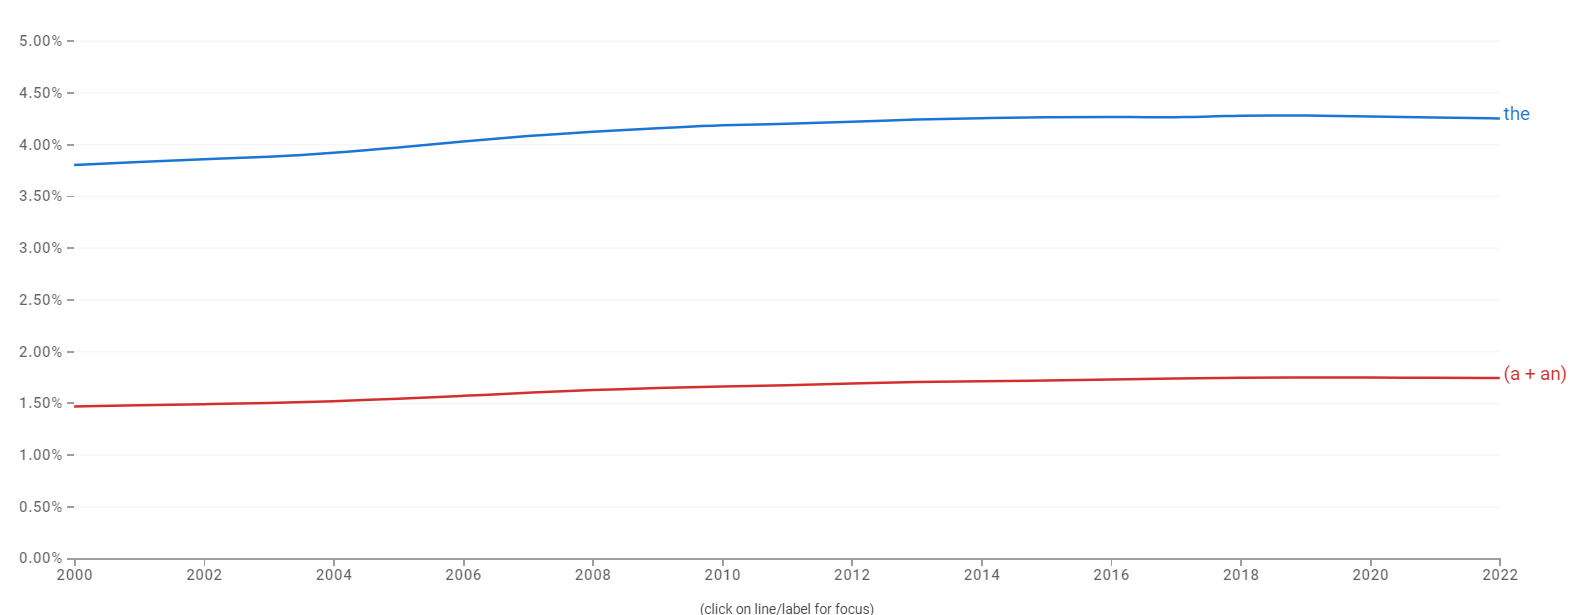

В библиотеке nltk есть готовые списки стоп-слов для разных языков. Например для русского языка:

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk_stopwords_ru = stopwords.words('russian')
print(nltk_stopwords_ru)

Для английского языка:

In [ ]:
nltk_stopwords_eng = stopwords.words('english')
print(nltk_stopwords_eng)

Эти списки легко дополнить при необходимости, например:

In [ ]:
nltk_stopwords_ru = nltk_stopwords_ru + ['ты', 'твои']

Стоп-слова обычно удаляются с помощью цикла, который проходит по токенизированному тексту и проверяет, не входит ли каждый токен в список стоп-слов. Если слово не входит, оно сохраняется в новый пустой список, если же входит - игнорируется.

In [ ]:
text = 'Я вас любил: любовь еще, быть может, В душе моей угасла не совсем; Но пусть она вас больше не тревожит; Я не хочу печалить вас ничем.'
nltk_stopwords_ru = stopwords.words('russian')
list_no_stop_words = [] #сюда будут сохраняться все "чистые" слова
for token in word_tokenize(text.lower()): #цикл по приведенному к нижнему регистру тексту пушкинского стихотворения
    if token not in nltk_stopwords_ru:
        list_no_stop_words.append(token)
print(list_no_stop_words)

Выглядит страшненько из-за пунктуации, но это нормально. Объединим обратно в единый текст:

In [ ]:
clean_pushkin = ' '.join(list_no_stop_words)
print(clean_pushkin)

**Задание 9.** Выберите любой ваш текст на английском языке и сохраните в переменную text_eng. Скопируйте цикл выше, но модифицируйте его так, чтобы он проверял на английские стоп-слова. Объедините полученный список токенов в новый единый текст.

In [ ]:
text_eng = #ваш код здесь

**Объединение.** На самом деле все эти этапы должны работать в синергии. Мы чистим текст от мусора, решаем проблемы с разрядками, приводим к нижнему регистру и удаляем стоп-слова, чтобы продолжать дальнейший анализ. Рассмотрим грязненький текст, из которого мы хотим получить количество слов, предложений, количество уникальных токенов, а также подготовить его к дальнейшей работе в виде очищенного текста.

In [ ]:
text_to_clean = 'Привет, это просто супер крутой пост, который я сделал для вас. Он просто необходим для всех! Да, и для тебя, @username! #круто #класс #посмотри #не_пропусти #хочу_поделиться #друзьям_понравится</br>'
clean_text = re.sub(r'_', ' ', text_to_clean.lower()) #заменяем нижнее подчеркивание на пробел, потому что там несколько слов так объединены
print('Количество слов в тексте:', len(clean_text.split())) #считаем количество слов известным нам способом
print('Количество предложений в тексте:', len(sent_tokenize(clean_text))) #считаем количество предложений
clean_text = re.sub(r'[^а-я !.?]', '', clean_text) #удаляем всё, кроме кириллицы, некоторых знаков препинания и пробелов

clean_tokens = [] #создаем цикл, который отфильтрует стоп-слова
nltk_stopwords_ru = stopwords.words('russian')
for token in word_tokenize(clean_text):
    if token not in nltk_stopwords_ru:
        clean_tokens.append(token)
print('Количество уникальных слов в тексте:', len(set(clean_tokens))) #с помощью set() создадим множество уникальных токенов и посмотрим их количество

new_text = ' '.join(clean_tokens) #объединим в единый текст обратно
new_text = re.sub(r' \.', '.', new_text) #приклеим отклеенные точки
new_text = re.sub(r' !', '!', new_text) #приклеим отклеенные восклицания
print(new_text) #результат

**Предобработка коллекции текстов.** 

Мы редко работаем с отдельными текстами. Чаще всего нас интересуют корпуса, или иначе - коллекции текстов. Позже мы с вами будем "забирать" тексты с компьютера или из CSV-таблиц с помощью библиотеки pandas, но в самом простом виде "корпус" можно хранить в переменных и в виде списка. Например:

In [ ]:
corpus_of_joy = ['Я просто обожаю кошек!', 'Пушкин - мой любимый поэт!']
print(corpus_of_joy)

In [ ]:
#Сколько у нас в корпусе текстов? Нетривиальная задача, когда их действительно много и взглядом не окинешь
print('Количество текстов в корпусе:', len(corpus_of_joy))

Обрабатывать такую коллекцию можно с помощью циклов, вы должны были познакомиться с ними на занятии по программированию 26 и 28 октября. Для начала можно просто распечатать каждый текст отдельно. Как вы знаете, цикл "проходится" по каждому элементу списка и совершает указанное действие с ним (в данном случае - распечатку):

In [ ]:
for text in corpus_of_joy:
    print(text)

Можно усложить вывод:

In [ ]:
for text in corpus_of_joy:
    print(text.lower()) #привели к нижнему регистру

Напишем цикл, который будет считать порядковый номер текста и выводить количество слов в нем:

In [ ]:
counter = 1
for text in corpus_of_joy:
    number_words = len(text.split()) #посчитаем количество слов в каждом из текстов
    print(f'Количество слов в тексте {counter}:', number_words)
    counter += 1

Можно преобразовать тексты и сохранить их в другой список. Это полезно, чтобы не совершать процесс обработки (очистки) каждый раз, когда мы хотим сделать какие-то подсчёты.

In [ ]:
import re

In [ ]:
lower_corpus_of_hate = [] #пока ещё пустой список, куда сохранятся все обработанные тексты
for text in corpus_of_joy: #инициируем цикл
    hate_speech = re.sub(r'обожаю', 'ненавижу', text.lower()) #приводим текст к нижнему регистру и меняем слово
    hate_speech = re.sub(r'любимый', 'нелюбимый', hate_speech) #обращаемся к уже измененному тексту и меняем ещё одно слово
    print(hate_speech) #поочередно распечатаем измененную строку
    lower_corpus_of_hate.append(hate_speech) #записываем в пустой список измененный текст

print(lower_corpus_of_hate)

Есть способ, который будет изменять оригинальный список. Нужно пользоваться им с осторожностью: всегда может оказаться так, что вам нужны оригинальные данные, а они уже утрачены, поэтому сохраняйте их в стороннем файле перед тем, как применить такой метод. Для этого нужно сделать цикл не по самому списку с текстами, а по индексам элементов этого списка. Для этого нужно посчитать длину списка с помощью **len()** и применить функцию **range()** к этому числу, который создаст пронумерованный индекс от 0 до последнего элемента списка.

In [ ]:
yet_another_corpus_of_joy = ['Я просто обожаю кошек!', 'Пушкин - мой любимый поэт!', 'Мой любимый цвет - синий!']
for index in range(len(yet_another_corpus_of_joy)):
    print(index)

После получения индексов остаётся только перезаписать элементы:

In [ ]:
yet_another_corpus_of_joy = ['Я просто обожаю кошек!', 'Пушкин - мой любимый поэт!', 'Мой любимый цвет - синий!']
for index in range(len(yet_another_corpus_of_joy)): #получаем индексы
    #получаем текст по индексу и совершаем первую замену
    hate_speech = re.sub(r'обожаю', 'ненавижу', yet_another_corpus_of_joy[index].lower()) #приводим текст к нижнему регистру и меняем слово
    hate_speech = re.sub(r'любимый', 'нелюбимый', hate_speech) #обращаемся к измененному тексту и ещё редактируем
    yet_another_corpus_of_joy[index] = hate_speech #подменяем элемент списка с индексом в index на измененный текст
print(yet_another_corpus_of_joy) #печатаем наш печальный результат

**Задание 10.** Создайте свой список текстов. Напишите любой цикл препроцессинга для него. Сделайте так, чтобы оригинальный текст в изначальном списке был заменён на отредактированный.

In [ ]:
#ваш код здесь

**Работа с файловой системой.**

Обычно мы работаем не с одним маленьким текстом или даже несколькими, которые мы вручную собрали и вставили в ячейку кода, заявив некоторую переменную, а берем корпуса из датасетов или из папок на вашем компьютере. Давайте откроем файлик с компьютера.

Например, мы можем указать прямой путь к искомому файлу. Для меня это будет так:

In [ ]:
path = 'C:\\Users\\Aleksandr\\Desktop\\disstexts\\Dostoevsky\\non-fiction\\1.txt'
with open(path, encoding='utf-8') as txt:
    text = txt.read() #нужно обязательно считать данные 
    print(len(text.split())) #дальше уже можно делать разные штучки, например, посчитать количество слов в письме

Можно работать несколько иначе, через библиотеку **os**:

In [ ]:
import os 

In [ ]:
where_we_are = os.getcwd() #cwd = current working directory
print(where_we_are)

Можно посмотреть, что лежит в этой папке:

In [ ]:
os.listdir('/') #что лежит в корневой папке?

Вообще нам надо сменить рабочую директорию. Сделаем это:

In [ ]:
os.chdir('C:\\Users\\Aleksandr\\Desktop\\disstexts\\Dostoevsky\\non-fiction') 
where_we_are = os.getcwd()
print(where_we_are)

И снова посмотрим, что у нас там лежит:

In [ ]:
file_names = os.listdir()
print(file_names) #что не так с нашим аутпутом?

Итак, мы получили список наших файликов, однако отсортированный как строку, а не как числа. Это нарушит порядок загрузки, если он нам важен. Поправим это с помощью функции:

In [ ]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower() #проверяет, если получаемый текст названия
    #является числом, тогда он преобразуется в int, иначе приводится к нижнему регистру 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] #применяет лямбда-функцию
    #к каждой подстроке, полученной через сплит по регулярному выражению: так мы получаем список чисел или строк
    #в нижем регистре, который потом будет отсортирован в return
    return sorted(data, key=alphanum_key)

#лямбда функция - это анонимная функция, т.е. такая, которой вы не даете название. В случае выше
#key - это аргумент функции, а в квадратных скобочках результат функции

In [ ]:
file_names = sorted_alphanumeric(os.listdir())
print(file_names)

Ура, теперь все отсортировалось корректно! Осталось только открыть тексты.

In [ ]:
for file in sorted_alphanumeric(os.listdir()):
    print(file) #итак, мы можем итерироваться по названию файла. Т.е. чтобы открыть этот файл, нам нужно склеить
    #название файла с адресом директории

Получим полную "прописку" каждого файла:

In [ ]:
for file in sorted_alphanumeric(os.listdir()):
    print(str(os.getcwd() + '\\' + file)) #получаем такую склейку. Как думаете, зачем ставим два \\?

Откроем:

In [ ]:
for file in sorted_alphanumeric(os.listdir()):
    with open(str(os.getcwd() + '\\' + file), encoding='utf-8') as txt:
        text = txt.read()
        print(text[:10]) #распечатаем первые 10 символов

Ну и напоследок сделаем датафрейм с этими текстами:

In [ ]:
texts = []
for file in sorted_alphanumeric(os.listdir()):
    with open(str(os.getcwd() + '\\' + file), encoding='utf-8') as txt:
        text = txt.read()
        texts.append(text)

In [ ]:
print(len(texts))

In [ ]:
import pandas as pd

In [ ]:
df_dost_letters = pd.DataFrame({'text': texts})
df_dost_letters

И добавим ещё какую-нибудь информацию. Например:

In [ ]:
text_lengths = []
for text in texts:
    text_length = len(text.split())
    text_lengths.append(text_length)

df_dost_letters['text_length'] = text_lengths
df_dost_letters

**Задание 11.** Как посчитать количество предложений в каждом из текстов? Давайте посчитаем и запишем в новый столбец.

**Задание 12.** Как посчитать количество слов с заглавной буквы? Давайте посчитаем и запишем в новый столбец.